In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import mne
from scipy.stats import ttest_rel, ttest_1samp, ttest_ind, kstest, wilcoxon
from statannotations.Annotator import Annotator

import glob
import os

import pickle
import sys

sys.path.append('../utils')
from ERP_utils import *
from update_sub_lists import *

In [2]:
good_listen_subjects, good_motor_subjects, musicians, nonmusicians = load_subject_lists()
ch_names_64, ch_names_72 = load_channels()
downfreq = 128
"""# Define mappings for tasks and participant groups
task_subjects = {
    'listen': good_listen_subjects,
    'motor': good_motor_subjects
}

participant_groups = {
    'all': lambda subjects: subjects,
    'musicians': lambda subjects: [x for x in subjects if x in musicians],
    'nonmusicians': lambda subjects: [x for x in subjects if x in nonmusicians]
}

# Get the list of subjects based on task and participant group
subjects_to_process = participant_groups[participants](task_subjects[task])"""



"# Define mappings for tasks and participant groups\ntask_subjects = {\n    'listen': good_listen_subjects,\n    'motor': good_motor_subjects\n}\n\nparticipant_groups = {\n    'all': lambda subjects: subjects,\n    'musicians': lambda subjects: [x for x in subjects if x in musicians],\n    'nonmusicians': lambda subjects: [x for x in subjects if x in nonmusicians]\n}\n\n# Get the list of subjects based on task and participant group\nsubjects_to_process = participant_groups[participants](task_subjects[task])"

In [3]:
subjects_to_process = good_listen_subjects
task = 'listen'

In [4]:
#-----------------------------
#           DIRECTORIES
#-----------------------------

evoked_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_ERP_data'
epochs_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_epochs_data'



In [5]:
#----------------------------
#           GROUPING EVOKEDS
#-----------------------------

evoked_list_pre = []
epochs_list_pre = []
evoked_list_post = []
epochs_list_post = []

#subject averages
epochs_list_pre_sa =[]

#for file in sorted(os.listdir(evoked_dir)):

for subject in subjects_to_process:
    print('Processing subject: ', subject)

    file_evokeds_pre = glob.glob(os.path.join(evoked_dir, f'{task}_ERP_pre_{subject}.fif'))[0]
    file_epochs_pre = glob.glob(os.path.join(epochs_dir, f'{task}_epochs_pre_{subject}.fif'))[0]
  
    evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
    evoked_list_pre.append(evoked_pre)
    epochs_pre = mne.read_epochs(file_epochs_pre)
    epochs_list_pre.append(epochs_pre)

    file_evokeds_post = glob.glob(os.path.join(evoked_dir, f'{task}_ERP_post_{subject}.fif'))[0]
    file_epochs_post = glob.glob(os.path.join(epochs_dir, f'{task}_epochs_post_{subject}.fif'))[0]
  
    evoked_post = mne.read_evokeds(file_evokeds_post)[0]
    evoked_list_post.append(evoked_post)
    epochs_post = mne.read_epochs(file_epochs_post)
    epochs_list_post.append(epochs_post)


concat_epochs_pre = mne.concatenate_epochs(epochs_list_pre)
concat_evoked_pre = mne.combine_evoked(evoked_list_pre, weights = 'equal')

concat_epochs_post = mne.concatenate_epochs(epochs_list_post)
concat_evoked_post = mne.combine_evoked(evoked_list_post, weights = 'equal')


Processing subject:  01
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_ERP_data/listen_ERP_pre_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 328 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_ERP_data/listen_ERP_post_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     50

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_48099/3582645391.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_ERP_data/listen_ERP_pre_01.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_48099/3582645391.py:23: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_01.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_pre = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_48099/3582645391.py:29: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_ERP_d

        0 CTF compensation matrices available
        nave = 328 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_04.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  05
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_ERP_data/listen_ERP_pre_05.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 328 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_48099/3582645391.py:31: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_04.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_post = mne.read_epochs(file_epochs_post)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_48099/3582645391.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_ERP_data/listen_ERP_pre_05.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_48099/3582645391.py:23: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_ep

Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  09
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_ERP_data/listen_ERP_pre_09.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 328 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_09.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/l

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_48099/3582645391.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_ERP_data/listen_ERP_pre_09.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_48099/3582645391.py:23: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_09.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_pre = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_48099/3582645391.py:29: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_ERP_d

    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  13
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_ERP_data/listen_ERP_pre_13.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 328 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_13.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correctio

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_48099/3582645391.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_ERP_data/listen_ERP_pre_13.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_48099/3582645391.py:23: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_13.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_pre = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_48099/3582645391.py:29: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_ERP_d

Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_ERP_data/listen_ERP_post_18.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 328 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_18.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  19
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_48099/3582645391.py:29: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_ERP_data/listen_ERP_post_18.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_post = mne.read_evokeds(file_evokeds_post)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_48099/3582645391.py:31: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_18.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_post = mne.read_epochs(file_epochs_post)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_48099/3582645391.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen

Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
6888 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
6879 matching events found
Applying baseline correction (mode: mean)


In [6]:
#concat_epochs_pre, concat_evoked_pre, concat_epochs_post, concat_evoked_post = load_evoked_epochs(subjects_to_process, task)

In [7]:
def compute_power(epochs, tmin = 0, tmax = 0.35, 
                  bands=['delta', 'theta', 'alpha', 'beta', 'gamma', 'all'], 
                  method = 'multitaper',
                  ch = 'all'):
    """
    Returns a DataFrame with power computed over each frequency band for given epochs.
    
    Parameters
    ----------
    epochs : mne.Epochs
        The epochs for which to compute the PSD and power.
    bands : list of str, optional
        List of frequency bands to compute power for. Default is ['delta', 'alpha'].
        
    Returns
    -------
    df : pd.DataFrame
        DataFrame where each column represents the power in a different frequency band.
    """

    freqbands = {'delta': [0.5, 4], 
                 'theta': [4, 8],
                 'alpha': [8, 12],
                 'beta': [12, 30],
                 'gamma': [30, 50],
                 'all': [0.5, 50]
                }

    
    power_dict = {}
    for key in bands:
        if key not in freqbands:
            continue  
        fmin, fmax = freqbands[key]

        psd = mne.Epochs.compute_psd(epochs, 
                                     method = method,
                                     fmin=fmin, 
                                     fmax=fmax, 
                                     tmin = tmin, 
                                     tmax = tmax)

        
        if ch == 'all': #average over all channels
            psd_ave_64 = psd.average() #average over epochs
            psd_ave = np.mean(psd_ave_64.get_data(), axis = 0) 
            
        else:
            assert isinstance (ch, list) #average over the selected channels
            ch_idx = ch_index(ch)
            psd_data = psd.get_data()
            psd_ch = psd_data[:, ch_idx[0], :]
    
            psd_ave = np.mean(psd_ch, axis = 0)


        #integrate PSD
        power = np.trapz(psd_ave)

        # save PSD
        power_dict[key] = power


    df = pd.DataFrame([power_dict])

    return df

In [76]:
bands_tocompute = ['alpha', 'beta', 'gamma','all']
epochs_tocompare = [epochs_list_pre, epochs_list_post]
ch_tocompare = ['Cz', 'CPz', 'FCz']
tmin = 0
tmax = 0.25

testlist = []
for j, epochs_list in enumerate(epochs_tocompare):
    
    power_data_list = []
    epochs_tocompute = epochs_list


    testlist.append(epochs_tocompute)
    for i, subject in enumerate(subjects_to_process): 

        # Compute the power for the current subject
        power_data = compute_power(epochs_tocompute[i], 
                                    tmin = tmin,
                                    tmax = tmax,
                                     bands = bands_tocompute,
                                     ch = ch_tocompare)

        # Record subject info
        power_data['subject'] = subject
        power_data['musician'] = ['musician' if subject in musicians else 'nonmusician']

        # Append the power data to the list
        power_data_list.append(power_data)

    # Concatenate subject data
        ####### THIS IS INCORRECT, I'M JUST CHANGING IT TO CHECK
    if j == 0:
        power_pre_df = pd.concat(power_data_list, ignore_index=True)
 
    elif j == 1:
        power_post_df =  pd.concat(power_data_list, ignore_index=True)


    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

In [77]:
power_pre_df['period'] = 'pre'
power_post_df['period'] = 'post'
power_all_df = pd.concat([power_pre_df, power_post_df])

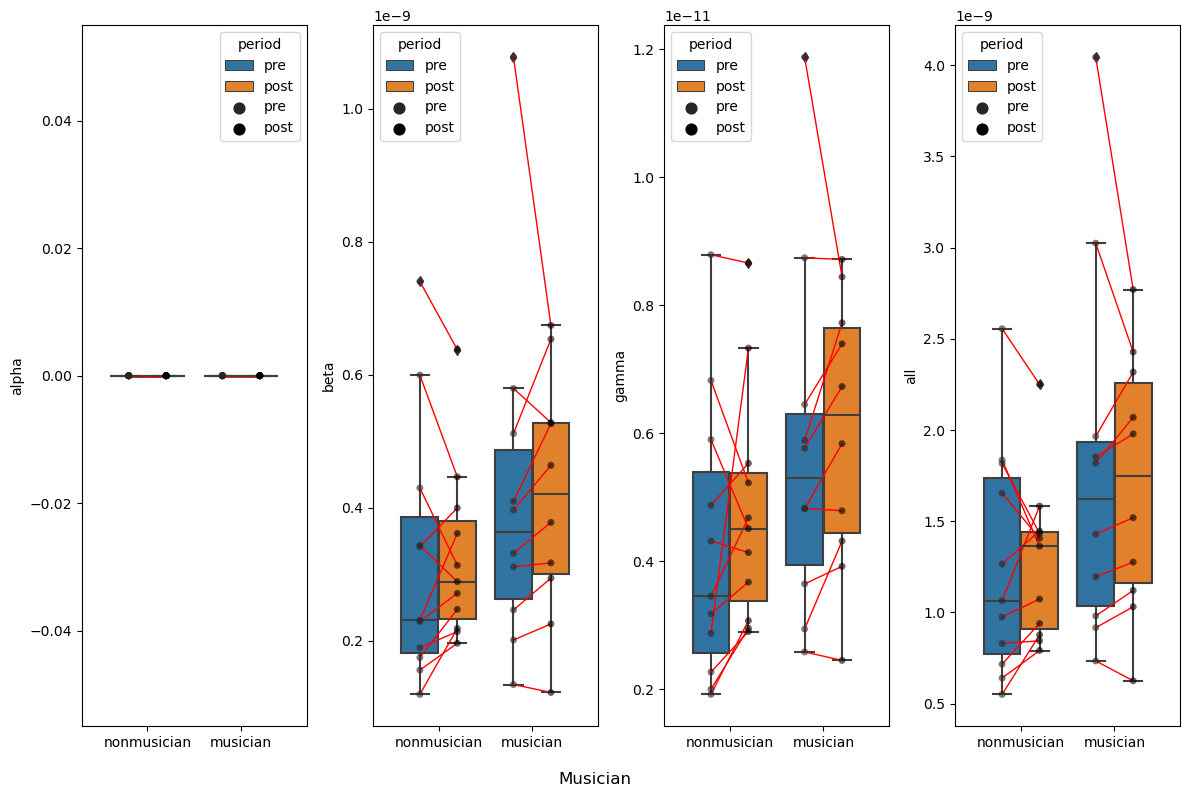

In [80]:
bands = ['alpha', 'beta', 'gamma', 'all']
groups = ['musicians', 'nonmusicians'] 

fig, axes = plt.subplots(nrows=1, ncols=len(bands), figsize=(12, 8), sharey=False)

for i, band in enumerate(bands):
    sns.boxplot(data = power_all_df, x='musician', y=band, hue='period', ax=axes[i])
    sns.stripplot(data = power_all_df, x='musician', y=band, hue='period',
                  color='black', jitter=False, dodge=True, alpha=0.6, ax=axes[i])
    axes[i].set_ylabel(band)
    axes[i].set_xlabel('')
    

    """    # Statistical annotation
    pairs = [('pre', 'post')]
    annotator = Annotator(axes[i], pairs, data=power_all_df, x='period', y=band)
    annotator.configure(test='Wilcoxon', text_format='star', loc='inside')
    annotator.apply_and_annotate()"""


   # Connect pre and post points for each subject
    subjects = power_all_df['subject'].unique()
    for subject in subjects:
        subject_data = power_all_df[power_all_df['subject'] == subject]
        if len(subject_data) == 2:  # Ensure there are both pre and post points
            pre_point = subject_data[subject_data['period'] == 'pre']
            post_point = subject_data[subject_data['period'] == 'post']
            if not pre_point.empty and not post_point.empty:
                # Get the y values for the pre and post points
                y_pre = pre_point[band].values[0]
                y_post = post_point[band].values[0]
                x_musician = pre_point['musician'].values[0]  # Assuming 'musician' is the same for both
                
                # Plot line connecting pre and post points
                if subject in musicians:
                    axes[i].plot([0.8,1.2], [y_pre, y_post], color='red', linestyle='-', linewidth=1)

                else:
                    axes[i].plot([-0.2,0.2], [y_pre, y_post], color='red', linestyle='-', linewidth=1)

fig.supxlabel('Musician')

plt.tight_layout()
plt.show()


In [81]:
#stats for within groups.
bands = ['alpha', 'beta', 'gamma', 'all']
groups = ['musician', 'nonmusician'] 

for band in bands:
    for group in groups:
        power_sub = power_all_df[(power_all_df['musician'] == group)][[band, 'period']]
        power_sub_pre = power_sub[power_sub['period'] == 'pre']
        power_sub_post = power_sub[power_sub['period']=='post']
        tstat, p_value = ttest_rel(power_sub_pre[band], power_sub_post[band])
        print(band, group, p_value)

alpha musician nan
alpha nonmusician nan
beta musician 0.9737086760920994
beta nonmusician 0.8984867520836305
gamma musician 0.561515438251428
gamma nonmusician 0.2649737135805745
all musician 0.6085720637498515
all nonmusician 0.9235618895920874


In [ ]:
#save power calculations

#power_all_df.to_csv(f'power_{task}.csv', index = False)

combining channels using "mean"
combining channels using "mean"


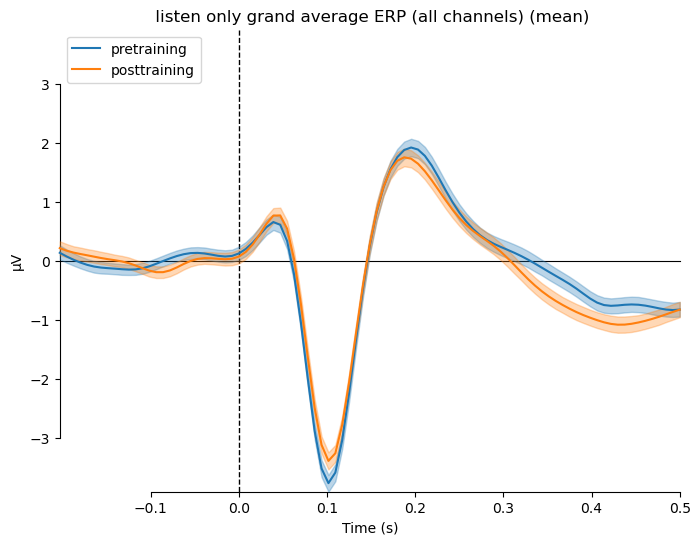

[<Figure size 800x600 with 1 Axes>]

In [ ]:
ga = dict(
        pretraining=list(concat_epochs_pre.iter_evoked()),
        posttraining=list(concat_epochs_post.iter_evoked()))
mne.viz.plot_compare_evokeds(ga, title = f' {task} only grand average ERP (all channels)',combine = 'mean')

combining channels using "mean"


/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_48099/3828194894.py:4: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(ga, title = f' {task} only grand average ERP (all channels)',


combining channels using "mean"


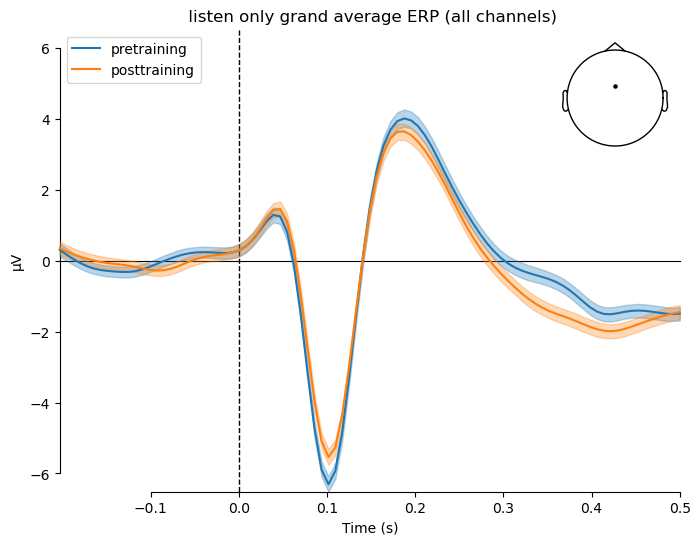

[<Figure size 800x600 with 2 Axes>]

In [ ]:
ga = dict(
        pretraining=list(concat_epochs_pre.iter_evoked()),
        posttraining=list(concat_epochs_post.iter_evoked()))
mne.viz.plot_compare_evokeds(ga, title = f' {task} only grand average ERP (all channels)',
                             combine = 'mean',
                             picks = 'FCz')